**Objekt Größenberechnung**
Quelle: https://www.youtube.com/watch?v=lbgl2u6KrDU mit Code (denke ich genauer)
Mit DinA4: https://www.youtube.com/watch?v=tk9war7_y0Q bis 11:00 
    ab24:00 wird A4 Papier spezifiziert


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import utlis


In [ ]:
import glob
#path=glob.glob("F:/Projektseminar/Baustellenbilder/Wand1_6.jpg") #funktioniert aus Gründen nicht

In [9]:
cap = cv2.VideoCapture(0)
cap.set(10,160)
cap.set(3,1920) #width
cap.set(4,1080) #hight
#Skalierungsfaktor sonst wäre das Bild nur 210*297
scale = 3
wP = 210 *scale
hP= 297 *scale

#Bild einlesen:
img = cv2.imread("F:\\Projektseminar\\Edge Detection\\Canny.jpg") #F:/Projektseminar/Baustellenbilder/Wand1_6.jpg
i=1
if i<2:  #while True: 
    imgContours , conts = utlis.getContours(img,minArea=10,filter=4, showCanny=False) #Filter 4 weil nur nach 4eckigen Objekten gesucht wird minArea=50000
    if len(conts) != 0:
        biggest = conts[0][2]
        #print(biggest)
        imgWarp = utlis.warpImg(img, biggest, wP,hP)
        imgContours2, conts2 = utlis.getContours(imgWarp,
                                                 minArea=2000, filter=4,
                                                 cThr=[50,50],draw = False)
        if len(conts) != 0:
            for obj in conts2:
                cv2.polylines(imgContours2,[obj[2]],True,(0,255,0),2)
                nPoints = utlis.reorder(obj[2])
                nW = round((utlis.findDis(nPoints[0][0]//scale,nPoints[1][0]//scale)/10),1)
                nH = round((utlis.findDis(nPoints[0][0]//scale,nPoints[2][0]//scale)/10),1)
                cv2.arrowedLine(imgContours2, (nPoints[0][0][0], nPoints[0][0][1]), (nPoints[1][0][0], nPoints[1][0][1]), #Ab hier bis imwrite nur Beschriftung
                                (255, 0, 255), 3, 8, 0, 0.05)
                cv2.arrowedLine(imgContours2, (nPoints[0][0][0], nPoints[0][0][1]), (nPoints[2][0][0], nPoints[2][0][1]),
                                (255, 0, 255), 3, 8, 0, 0.05)
                x, y, w, h = obj[3]
                cv2.putText(imgContours2, '{}cm'.format(nW), (x + 30, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5,
                            (255, 0, 255), 2)
                cv2.putText(imgContours2, '{}cm'.format(nH), (x - 70, y + h // 2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5,
                            (255, 0, 255), 2)
        cv2.imwrite("F:\\Projektseminar\\Edge Detection\\Canny_Resultat.jpg", imgContours2)
        #cv2.imshow('A4', imgContours2)
 
    #img = cv2.resize(img,(0,0),None,0.5,0.5) #error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4058: error: (-215:Assertion failed) !dsize.empty() in function 'cv::resize'
    #cv2.imshow('Original',img)
    cv2.waitKey(1)
    i=i+1

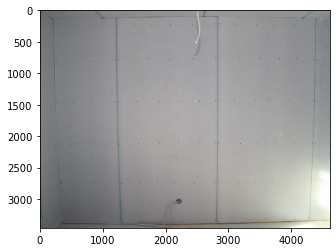

In [ ]:
img = cv2.imread("F:/Projektseminar/Baustellenbilder/Wand1_6.jpg")
#cv2.imshow("Bild", img)
plt.imshow(img)

In [ ]:
#Bild Warpen:
#https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f
#Statt der festgelegten Punkte im Bild müssen wir die Eckpunkte im Aruco Sticker benutzen!
#Wahrscheinlich besser: https://www.youtube.com/watch?v=dpjhGobnCxU

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow
import cv2

img =cv2.imread("F:\\Projektseminar\\Edge Detection\\Test.jpg")
